<a href="https://colab.research.google.com/github/rhondacodestuff/CIND-820-Capstone/blob/main/CIND820_FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-learn
!pip install ydata-profiling
!pip install matplotlib

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from ydata_profiling import ProfileReport

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v1/fatal-police-shootings-data.csv", sep=',')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8002 non-null   int64  
 1   name                     7548 non-null   object 
 2   date                     8002 non-null   object 
 3   manner_of_death          8002 non-null   object 
 4   armed                    7791 non-null   object 
 5   age                      7499 non-null   float64
 6   gender                   7971 non-null   object 
 7   race                     6485 non-null   object 
 8   city                     8002 non-null   object 
 9   state                    8002 non-null   object 
 10  signs_of_mental_illness  8002 non-null   bool   
 11  threat_level             8002 non-null   object 
 12  flee                     7036 non-null   object 
 13  body_camera              8002 non-null   bool   
 14  longitude               

In [25]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


# Exploratory Data Analysis

[CLICK HERE: View y-data profiling EDA in Jupyter Notebook Viewer](https://nbviewer.org/github/rhondacodestuff/CIND-820-Capstone/blob/main/CIND820_EDA_and_DataCleaning.ipynb)

Because Github can only render static html, the report generated from ydata_profiling can be viewed at https://nbviewer.org/


### Duplicated Values

In [26]:
df.duplicated().sum()

0

### Null Values

In [27]:
null_counts = df.isnull().sum()

# Calculate null percentage
null_percentage = (null_counts / len(df)) * 100

# DataFrame to display the results
null_summary = pd.DataFrame({'Null Counts': null_counts, 'Null Percentage': null_percentage})

print(null_summary)

                         Null Counts  Null Percentage
id                                 0         0.000000
name                             454         5.673582
date                               0         0.000000
manner_of_death                    0         0.000000
armed                            211         2.636841
age                              503         6.285929
gender                            31         0.387403
race                            1517        18.957761
city                               0         0.000000
state                              0         0.000000
signs_of_mental_illness            0         0.000000
threat_level                       0         0.000000
flee                             966        12.071982
body_camera                        0         0.000000
longitude                        840        10.497376
latitude                         840        10.497376
is_geocoding_exact                 0         0.000000


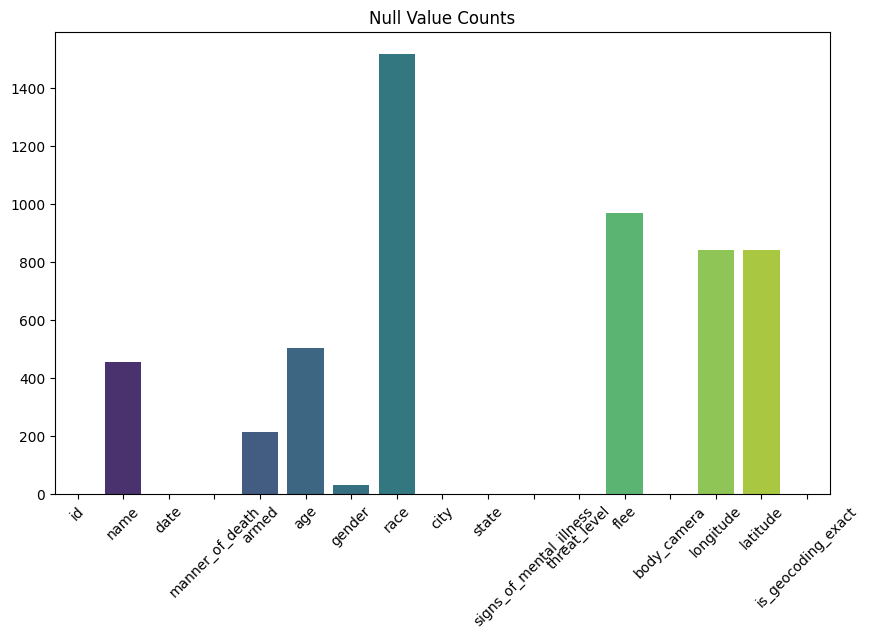

In [28]:
null_counts=df.isna().sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="viridis")
plt.title("Null Value Counts")
plt.xticks(rotation=45)
plt.show()

### 'signs_of_mental_illness' distribution

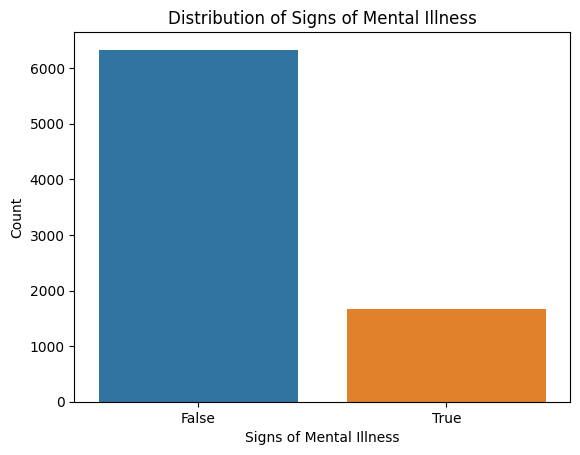

In [29]:
sns.countplot(x='signs_of_mental_illness', data=df)

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.title('Distribution of Signs of Mental Illness')

plt.show()

### 'age' boxplot

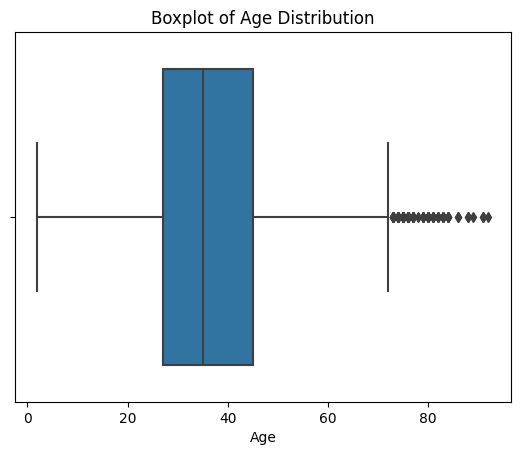

In [30]:
sns.boxplot(x=df['age'])

plt.xlabel('Age')
plt.title('Boxplot of Age Distribution')

plt.show()

In [31]:
df['age'].describe()

count    7499.000000
mean       37.209228
std        12.979490
min         2.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        92.000000
Name: age, dtype: float64

### 'age' distribution

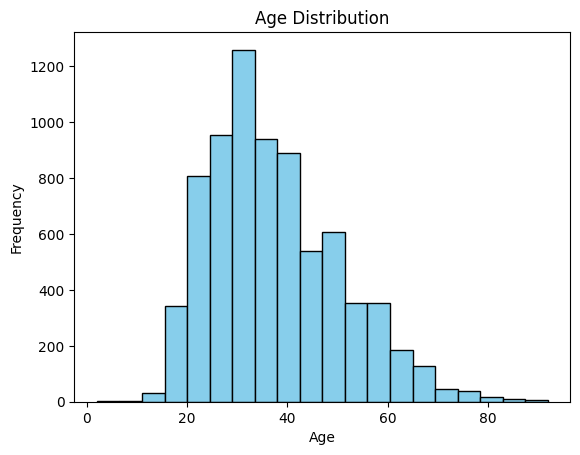

In [32]:
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

plt.show()

### Value counts of categorical variables

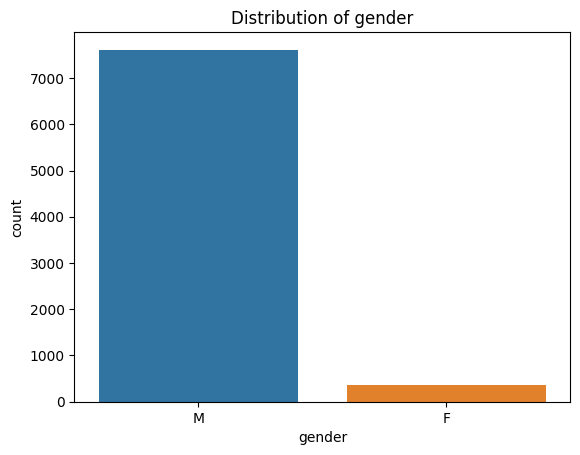

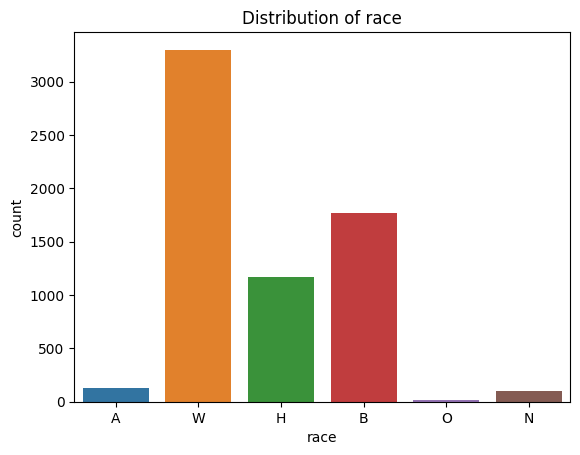

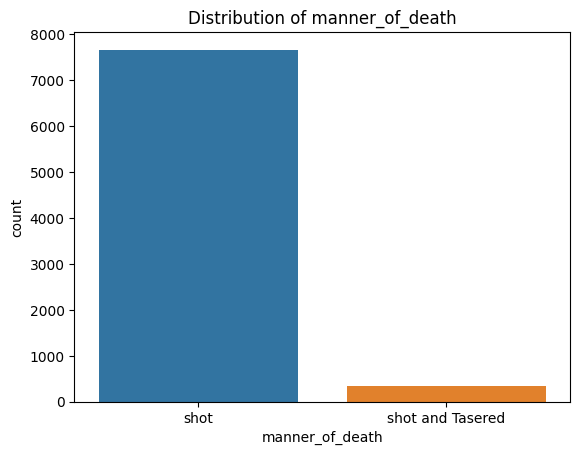

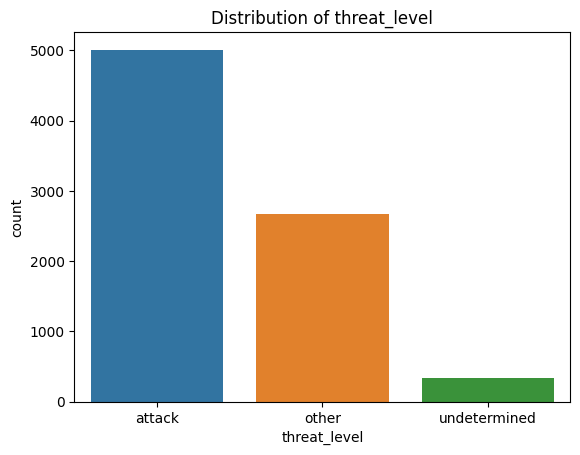

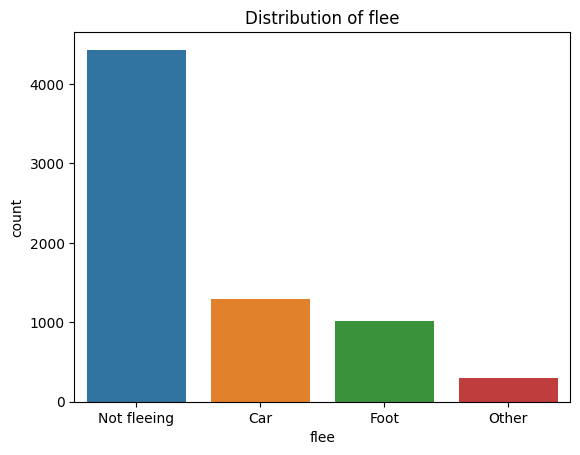

In [34]:
# List of categorical variables
categorical_vars = ['gender', 'race', 'manner_of_death', 'threat_level', 'flee']

# Plot count plots for each categorical variable
for var in categorical_vars:
    sns.countplot(x=var, data=df)
    plt.title(f'Distribution of {var}')
    plt.show()

### Box plot of 'age' by 'signs_of_mental_illness'

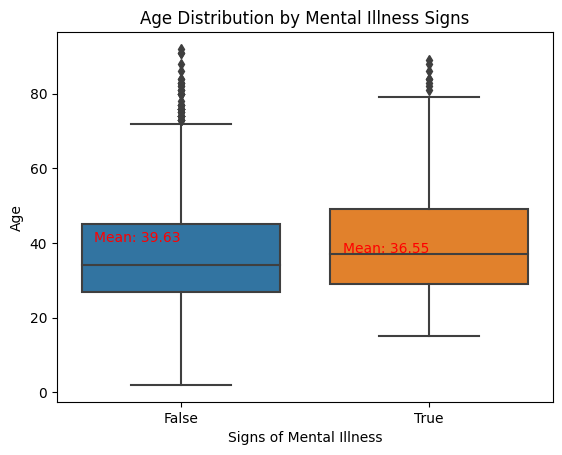

In [35]:
# Compare means for both groups
mean_with_mental_illness = df[df['signs_of_mental_illness']]['age'].mean()
mean_without_mental_illness = df[~df['signs_of_mental_illness']]['age'].mean()

sns.boxplot(x='signs_of_mental_illness', y='age', data=df)

plt.text(0, mean_with_mental_illness, f'Mean: {mean_with_mental_illness:.2f}', ha='right', va='bottom', color='red')
plt.text(1, mean_without_mental_illness, f'Mean: {mean_without_mental_illness:.2f}', ha='right', va='bottom', color='red')

plt.xlabel('Signs of Mental Illness')
plt.ylabel('Age')
plt.title('Age Distribution by Mental Illness Signs')

plt.show()

### Stacked Bar Chart for Target Variable vs. Categorical Features:

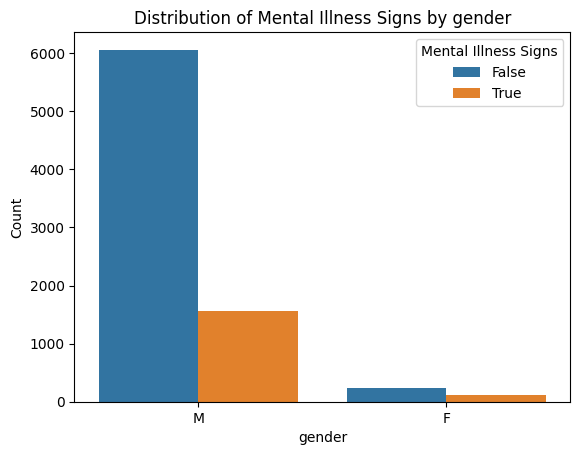

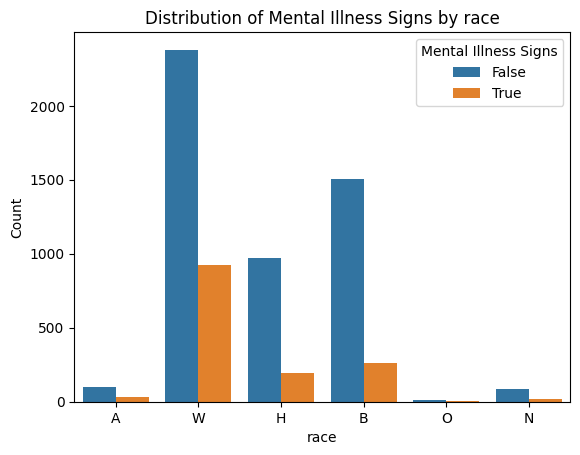

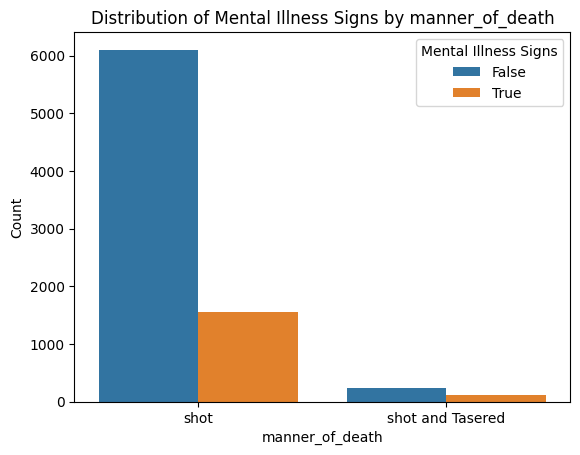

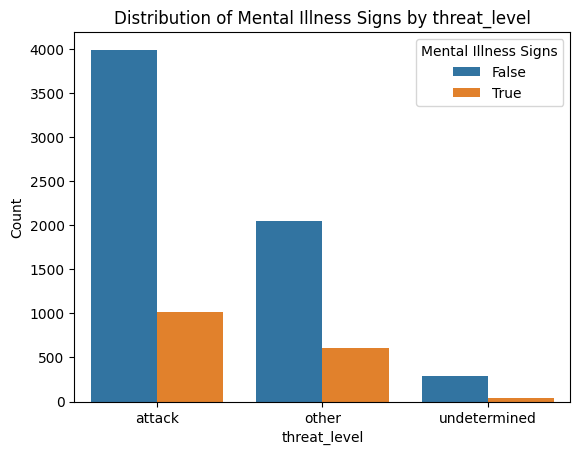

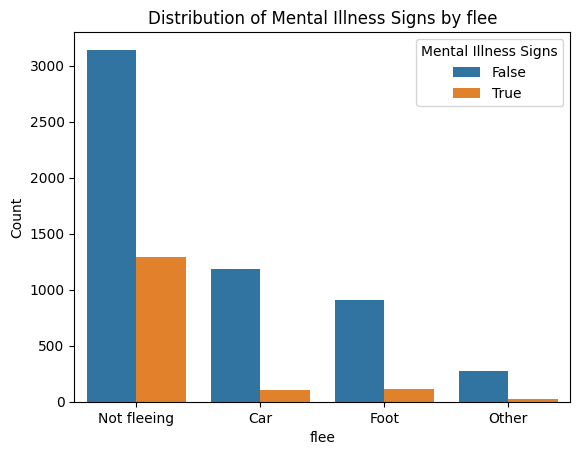

In [36]:
# List of categorical features
categorical_features = ['gender', 'race', 'manner_of_death', 'threat_level', 'flee']

# Create stacked bar charts for each categorical feature
for feature in categorical_features:
    sns.countplot(x=feature, hue='signs_of_mental_illness', data=df)
    plt.title(f'Distribution of Mental Illness Signs by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Mental Illness Signs', loc='upper right')
    plt.show()


### Proportion of target variable across categorical variables

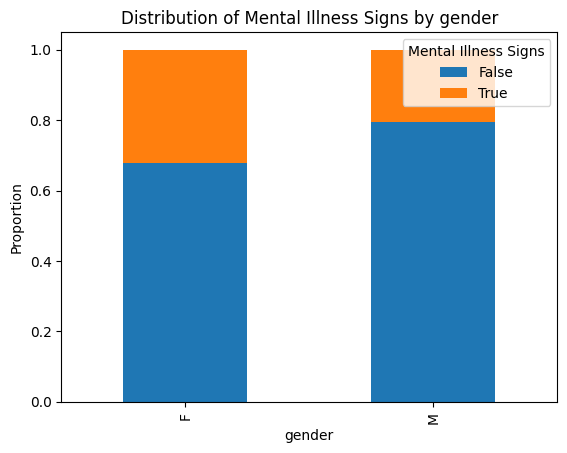

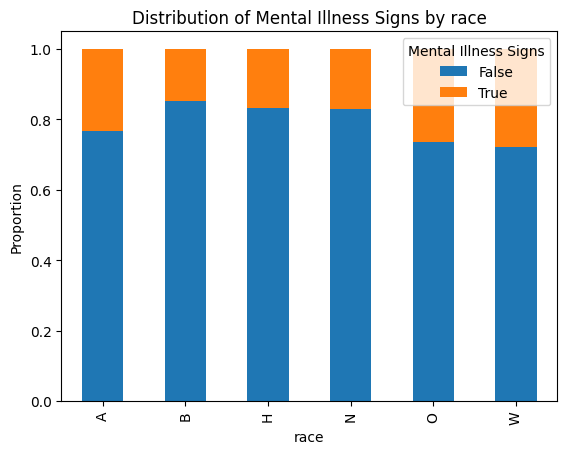

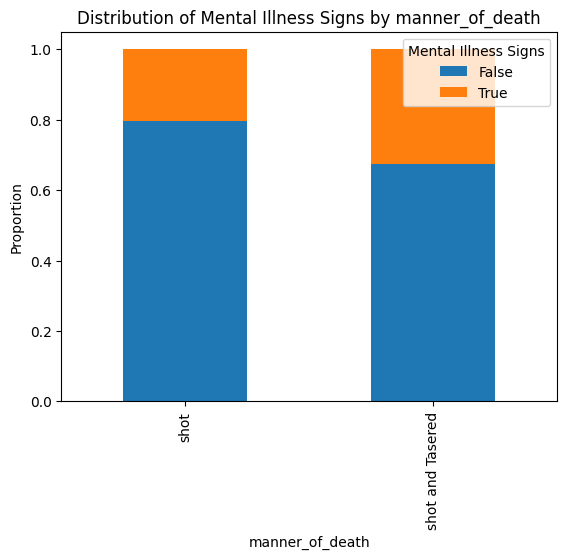

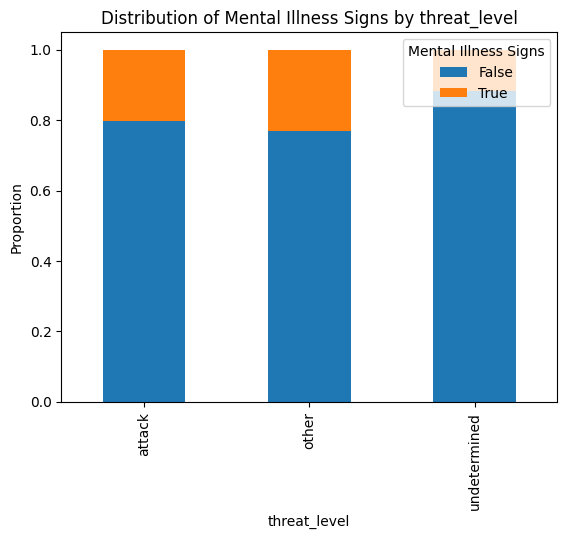

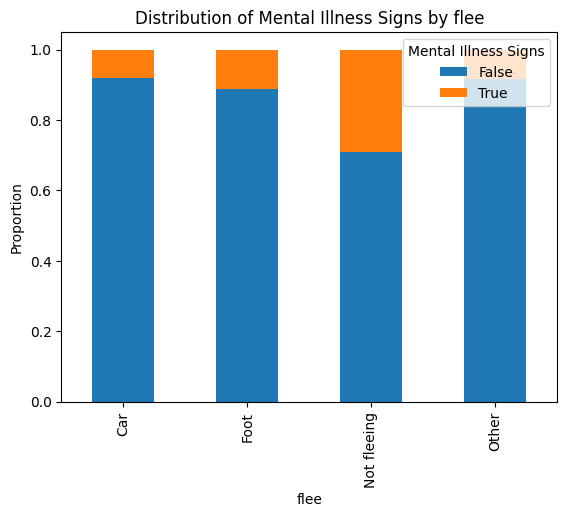

In [37]:
# List of categorical features
categorical_features = ['gender', 'race', 'manner_of_death', 'threat_level', 'flee']

# Create stacked bar charts for each categorical feature
for feature in categorical_features:
    # Calculate proportions
    proportions = df.groupby([feature, 'signs_of_mental_illness']).size().unstack()
    proportions = proportions.div(proportions.sum(axis=1), axis=0)  # Normalize proportions

    # Plot stacked bar chart
    proportions.plot(kind='bar', stacked=True)

    # Add labels and title
    plt.title(f'Distribution of Mental Illness Signs by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.legend(title='Mental Illness Signs', loc='upper right')

    # Show plot
    plt.show()


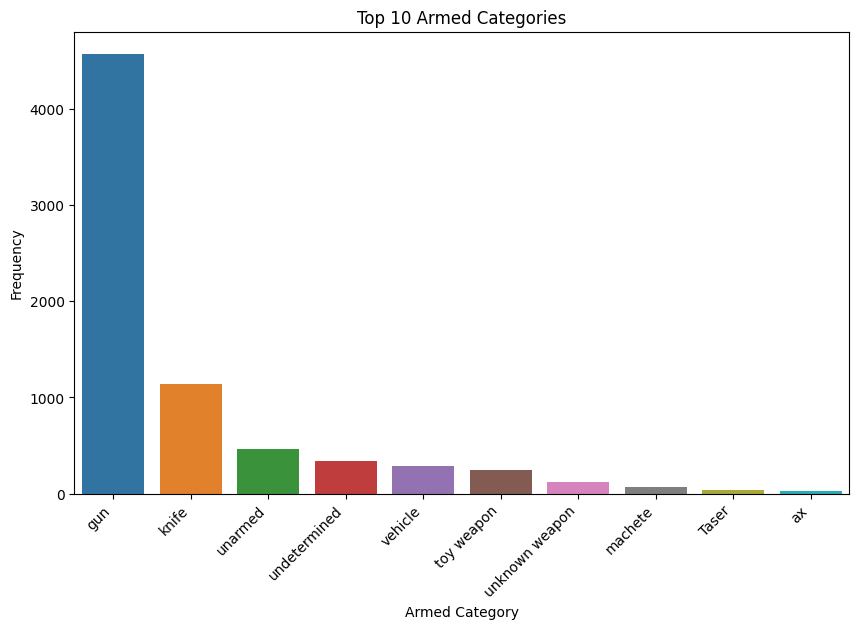

In [38]:

top_n_armed = df['armed'].value_counts().nlargest(10)

# Plot the distribution of the top N armed categories
plt.figure(figsize=(10, 6))
sns.barplot(x=top_n_armed.index, y=top_n_armed.values)
plt.xlabel('Armed Category')
plt.ylabel('Frequency')
plt.title(f'Top {10} Armed Categories')
plt.xticks(rotation=45, ha='right')
plt.show()


# Data Preparation

- **Id**: drop column
  - 100% unique values (high cardinality)
- **Name**: drop column
  - 99.5% unique values (high cardinality)
  - Anonymizes sensitive data
- **City**: drop column
  - 40% unique values
- **Date**: drop column
  - Ensures model is adaptable to new inputs/police encounters without being overly reliant on historical temporal data
- **Longitude**: drop column
  - 87% unique values (high cardinality)
- **Latitude**: drop column
  - 76% unique values (high cardinality)
- **Is_geocoding_exact**: drop column
  - 'True' occurs 99.8% of time

In [7]:
df = df.drop(['id', 'name', 'date', 'city', 'latitude', 'longitude', 'is_geocoding_exact'], axis=1)

- **Armed**: drop rows with missing values (2.6%)
  - Reduce cardinality (106 distinct values) by classifying unique categories < 20 counts = 'Other'
  - This is done before splitting the dataset to maintain coherence of the classes


In [8]:
df = df.dropna(subset=['armed'])

In [9]:
class_frequency = df['armed'].value_counts()

# Calculate the percentage of each class
class_percentage = (df['armed'].value_counts(normalize=True)) * 100

# Create a DataFrame to display the results
class_summary = pd.DataFrame({'Frequency': class_frequency, 'Percentage': class_percentage})

class_summary.head(10)

,Frequency,Percentage
armed,,
gun,4573,58.695931
knife,1142,14.657939
unarmed,460,5.904248
undetermined,338,4.338339
vehicle,284,3.645232
toy weapon,248,3.183160
unknown weapon,121,1.553074
machete,65,0.834296
Taser,39,0.500578


In [10]:
counts = df.armed.value_counts()
mask = df.armed.isin(counts[counts<20].index)
df['armed'][mask]='other'

In [11]:
df.armed.value_counts()

armed
gun                4573
knife              1142
unarmed             460
other               343
undetermined        338
vehicle             284
toy weapon          248
unknown weapon      121
machete              65
Taser                39
ax                   30
sword                27
gun and knife        27
gun and vehicle      27
sharp object         25
hammer               22
baseball bat         20
Name: count, dtype: int64

In [12]:
df['armed'].nunique()

17

- **Gender**: drop rows with missing values (0.4%)


In [13]:
df = df.dropna(subset=['gender'])

Remaining missing values (methods applied post test-train split)

In [14]:
missing_values = pd.DataFrame(df.isnull().sum(), columns=['missing_count'])
missing_values['missing_percentage'] = (missing_values['missing_count'] / len(df)) * 100

print(missing_values)

                         missing_count  missing_percentage
manner_of_death                      0            0.000000
armed                                0            0.000000
age                                478            6.159794
gender                               0            0.000000
race                              1478           19.046392
state                                0            0.000000
signs_of_mental_illness              0            0.000000
threat_level                         0            0.000000
flee                               938           12.087629
body_camera                          0            0.000000


# Data types
- *signs_of_mental_illness*: convert to boolean
- *body_camera*: convert to boolean
- *manner_of_death*: convert to category
- *armed*: convert to category
- *gender*: convert to category
- *race*: convert to category
- *state*: convert to category
- *threat_level*: convert to category
- *flee*: convert to category

In [15]:
df['signs_of_mental_illness'] = df['signs_of_mental_illness'].astype(bool)
df['body_camera'] = df['body_camera'].astype(bool)

columns_to_convert_to_category = ['manner_of_death', 'armed', 'gender', 'race', 'state', 'threat_level', 'flee']
df[columns_to_convert_to_category] = df[columns_to_convert_to_category].astype('category')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760 entries, 0 to 8001
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   manner_of_death          7760 non-null   category
 1   armed                    7760 non-null   category
 2   age                      7282 non-null   float64 
 3   gender                   7760 non-null   category
 4   race                     6282 non-null   category
 5   state                    7760 non-null   category
 6   signs_of_mental_illness  7760 non-null   bool    
 7   threat_level             7760 non-null   category
 8   flee                     6822 non-null   category
 9   body_camera              7760 non-null   bool    
dtypes: bool(2), category(7), float64(1)
memory usage: 193.4 KB


For the remaining features with missing counts (age, race, and flee) these will be imputed after the train-test split to prevent data leakage.

# Train-Test split and Imputation

In [17]:
df2 = df.copy()

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7760 entries, 0 to 8001
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   manner_of_death          7760 non-null   category
 1   armed                    7760 non-null   category
 2   age                      7282 non-null   float64 
 3   gender                   7760 non-null   category
 4   race                     6282 non-null   category
 5   state                    7760 non-null   category
 6   signs_of_mental_illness  7760 non-null   bool    
 7   threat_level             7760 non-null   category
 8   flee                     6822 non-null   category
 9   body_camera              7760 non-null   bool    
dtypes: bool(2), category(7), float64(1)
memory usage: 193.4 KB


### Train-test split

In [19]:
# Define the features and target variable
X = df2.drop(columns=['signs_of_mental_illness'])
y = df2['signs_of_mental_illness']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (6208, 9) (6208,)
Testing set shape: (1552, 9) (1552,)


### Impute age with median of training set

In [21]:
# Compute median of X_train's 'age' feature
age_median = X_train['age'].median()

# Impute median for missing values in X_train and X_test
X_train['age'].fillna(age_median, inplace=True)
X_test['age'].fillna(age_median, inplace=True)

### Impute race and flee with mode using SimpleImputer

In [22]:
from sklearn.impute import SimpleImputer

# Define the imputer for 'race' and 'flee' columns
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the imputer on the entire dataset for 'race' and 'flee' columns
X_train_imputed = X_train.copy()
X_train_imputed[['race', 'flee']] = imputer.fit_transform(X_train[['race', 'flee']])

# Transform the testing set for 'race' and 'flee' columns
X_test_imputed = X_test.copy()
X_test_imputed[['race', 'flee']] = imputer.transform(X_test[['race', 'flee']])

### One-hot encode categorical variables (nominal)

In [23]:
# List of columns to one-hot encode
columns_to_encode = ['manner_of_death', 'armed', 'gender', 'race', 'state', 'threat_level', 'flee']

# One-hot encode the nominal categorical variables
X_train_encoded = pd.get_dummies(X_train_imputed, columns=columns_to_encode, dtype=int)
X_test_encoded = pd.get_dummies(X_test_imputed, columns=columns_to_encode, dtype=int)

X_train_encoded

,age,body_camera,manner_of_death_shot,manner_of_death_shot and Tasered,armed_Taser,armed_ax,armed_baseball bat,armed_gun,armed_gun and knife,armed_gun and vehicle,...,state_WI,state_WV,state_WY,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other
4293,45.0,False,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4138,25.0,False,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
4152,32.0,False,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2122,26.0,False,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4264,59.0,False,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5432,26.0,True,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
5597,44.0,True,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
906,23.0,False,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
7833,31.0,False,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


# Training / Modeling (signs_of_mental_illness)
4 different models will be trained to predict signs_of_mental_illness
- Logistic Regression
- SVC (Support Vector Classification)
- Decision Tree
- Random Forest

In [24]:
# Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score
from prettytable import PrettyTable

In [26]:
# Initialize models
logistic_regression = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

In [27]:
# Train models
logistic_regression.fit(X_train_scaled, y_train)
svc.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [28]:
# Predictions
lr_pred = logistic_regression.predict(X_test_scaled)
svc_pred = svc.predict(X_test_scaled)
dt_pred = decision_tree.predict(X_test_scaled)
rf_pred = random_forest.predict(X_test_scaled)

### Benchmark models

In [29]:
# Evaluate models
eval_table = PrettyTable()
eval_table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

models = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest']
predictions = [lr_pred, svc_pred, dt_pred, rf_pred]

for i, preds in enumerate(predictions):
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)

    precision = report['True']['precision']
    recall = report['True']['recall']
    f1_score = report['True']['f1-score']

    eval_table.add_row([models[i], f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1_score:.4f}"])

print(eval_table)


+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |  0.7771  |   0.4348  | 0.0588 |  0.1036  |
|         SVC         |  0.7796  |   0.4375  | 0.0206 |  0.0393  |
|    Decision Tree    |  0.7152  |   0.3311  | 0.2941 |  0.3115  |
|    Random Forest    |  0.7558  |   0.3860  | 0.1941 |  0.2583  |
+---------------------+----------+-----------+--------+----------+


SVC has the highest accuracy, but the lowest recall and F1-score. This suggests that the model is not effective at identifying positive instances, potentially due to the class imbalance. Similarly, logistic regression demonstrates a high accuracy but a poor recall and F1-score. In contrast, decision tree has the lowest accuracy but the highest recall and F1-score, which suggests that the model may be identifying more true positives at the expense of potentially including more false positives.

### AUROC Values

In [39]:
# Calculate AUROC scores for each model
auroc_scores = []
models = [logistic_regression, random_forest]  # Only models that support predict_proba
predictions = [lr_pred, rf_pred]

for model, preds in zip(models, predictions):
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    auroc = roc_auc_score(y_test, y_pred_prob)
    auroc_scores.append(auroc)

table = PrettyTable()
table.field_names = ["Model", "AUROC"]

for model_name, score in zip(["Logistic Regression", "Random Forest"], auroc_scores):
    table.add_row([model_name, f"{score:.4f}"])

print(table)

+---------------------+--------+
|        Model        | AUROC  |
+---------------------+--------+
| Logistic Regression | 0.7199 |
|    Random Forest    | 0.6599 |
+---------------------+--------+


The AUROC (Area Under the Receiver Operating Characteristic Curve) is a metric used to evaluate the performance of binary classification models. It represents the probability that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance. In this comparison, the Logistic Regression model has a higher AUROC of 0.7199 compared to the Random Forest model's AUROC of 0.6599, potentially indicating that the Logistic Regression model has better discriminatory power in distinguishing between the two classes.



### Confusion Matrices

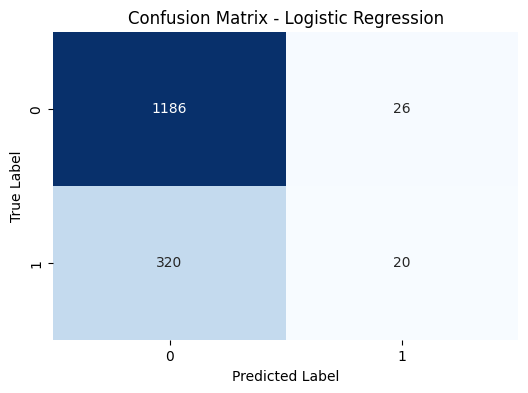

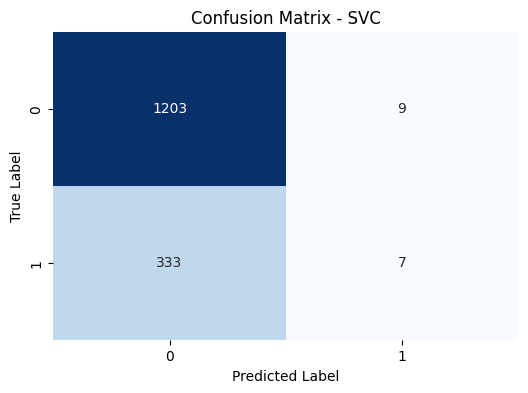

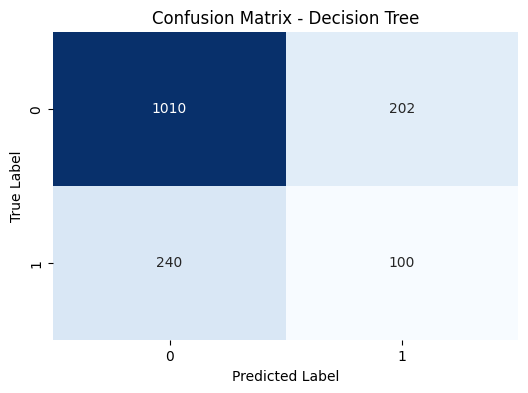

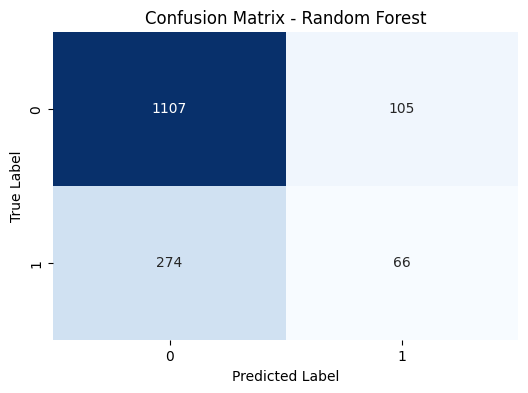

In [42]:
models = [
    ("Logistic Regression", logistic_regression),
    ("SVC", svc),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest)
]


for model_name, model in models:
    # Fit the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


### 10-Fold Cross Validation
- Check if the models are overfitting

In [ ]:
# Perform cross-validation on Logistic Regression
acc_scores_train_logistic = cross_val_score(logistic_regression, X_train_scaled, y_train, scoring="accuracy", cv=10)
logistic_acc_mean = acc_scores_train_logistic.mean()

# Perform cross-validation on SVC
acc_scores_train_svc = cross_val_score(svc, X_train_scaled, y_train, scoring="accuracy", cv=10)
svc_acc_mean = acc_scores_train_svc.mean()

# Perform cross-validation on Decision Tree
acc_scores_train_tree = cross_val_score(decision_tree, X_train_scaled, y_train, scoring="accuracy", cv=10)
tree_acc_mean = acc_scores_train_tree.mean()

# Perform cross-validation on Random Forest
acc_scores_train_forest = cross_val_score(random_forest, X_train_scaled, y_train, scoring="accuracy", cv=10)
forest_acc_mean = acc_scores_train_forest.mean()

# Create a PrettyTable for evaluation
cv_table = PrettyTable()
cv_table.field_names = ["Model", "Cross-Validation Accuracy"]
cv_table.add_row(["Logistic Regression", logistic_acc_mean])
cv_table.add_row(["SVC", svc_acc_mean])
cv_table.add_row(["Decision Tree", tree_acc_mean])
cv_table.add_row(["Random Forest", forest_acc_mean])

print(cv_table)

+---------------------+---------------------------+
|        Model        | Cross-Validation Accuracy |
+---------------------+---------------------------+
| Logistic Regression |     0.7880175055841254    |
|         SVC         |     0.7891436808477481    |
|    Decision Tree    |     0.7300251934964417    |
|    Random Forest    |     0.7427512856474989    |
+---------------------+---------------------------+


All of the models demonstrate comparable accuracies to the test set accuracy, suggesing that these models are not overfitting.

### Stratified 10-fold cross validation
- Ensures that each fold of the dataset maintains the same class distribution as the original training set to addres the imbalance in the target variable 'signs_of_mental_illness'

In [41]:
from sklearn.model_selection import StratifiedKFold
from prettytable import PrettyTable

# Define cross-validation strategy
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
models = [
    ("Logistic Regression", logistic_regression),
    ("SVC", svc),
    ("Decision Tree", decision_tree),
    ("Random Forest", random_forest)
]

cv_table = PrettyTable()
cv_table.field_names = ["Model", "Cross-Validation Accuracy"]

for model_name, model in models:
    acc_scores_train = cross_val_score(model, X_train_scaled, y_train, scoring="accuracy", cv=stratified_kfold)
    acc_mean = acc_scores_train.mean()
    cv_table.add_row([model_name, acc_mean])

print(cv_table)

+---------------------+---------------------------+
|        Model        | Cross-Validation Accuracy |
+---------------------+---------------------------+
| Logistic Regression |     0.7872105345176874    |
|         SVC         |     0.7902708950184405    |
|    Decision Tree    |     0.7129478988104514    |
|    Random Forest    |     0.7477421952106383    |
+---------------------+---------------------------+


In stratified cross-validation, the class distribution in each fold is approximately the same as the original dataset, ensuring that each fold is representative of the overall class distribution. This approach helps to prevent issues where certain classes may be underrepresented or overrepresented in certain folds, which can lead to biased model performance estimates.

When using this metric, logistic regression and SVC maintain a similar accuracy average to using k-fold cross validation, but our decision tree model shows a slight decrease in accuracy from 0.74 to 0.71. This might suggest that the decision tree model is more sensitive to variations in class distribution across folds, highlighting the importance of employing stratified cross-validation to mitigate such effects. The random forest model however increases slightly with stratified k-fold cross-validation, implying improved generalization when considering class imbalances.

# Feature importance

Logistic Regression feature importance

In [58]:
# Get feature coefficients
coefficients = logistic_regression.coef_[0]

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': X_train_encoded.columns, 'Coefficient': np.abs(coefficients)})

# Sort features by coefficient magnitude
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

feature_importance_df.head(10)

,Feature,Coefficient
85,flee_Not fleeing,0.249025
20,armed_vehicle,0.232294
83,flee_Car,0.183766
11,armed_knife,0.166659
16,armed_toy weapon,0.140308
28,race_W,0.126980
0,age,0.119891
13,armed_other,0.116349
19,armed_unknown weapon,0.115488
18,armed_undetermined,0.115283


Decision Tree feature imoprtance (embedded method)

In [50]:
# Get feature importances for Decision Tree
dt_feature_importances = decision_tree.feature_importances_

# Create a DataFrame to store feature importance
dt_feature_importance_df = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': dt_feature_importances})

# Sort features by importance
dt_feature_importance_df = dt_feature_importance_df.sort_values(by='Importance', ascending=False)

dt_feature_importance_df.head(10)

,Feature,Importance
0,age,0.341354
1,body_camera,0.040370
85,flee_Not fleeing,0.037826
81,threat_level_other,0.028875
80,threat_level_attack,0.028070
33,state_CA,0.027022
72,state_TX,0.019716
7,armed_gun,0.019036
38,state_FL,0.015319
17,armed_unarmed,0.015253


Random Forest feature importance (embedded method)

In [57]:
# Get feature importances for Random Forest
rf_feature_importances = random_forest.feature_importances_

# Create a DataFrame to store feature importance
rf_feature_importance_df = pd.DataFrame({'Feature': X_train_encoded.columns, 'Importance': rf_feature_importances})

# Sort features by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)

rf_feature_importance_df.head(10)


,Feature,Importance
0,age,0.386051
1,body_camera,0.031768
85,flee_Not fleeing,0.023411
33,state_CA,0.021177
80,threat_level_attack,0.020476
81,threat_level_other,0.020427
11,armed_knife,0.016685
28,race_W,0.016466
7,armed_gun,0.016236
72,state_TX,0.016050


Chi-Square feature importance (filter method)

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Instantiate SelectKBest to select top k features
k_best_selector = SelectKBest(score_func=chi2, k=10)

# Fit the selector to your encoded data
X_train_encoded_selected = k_best_selector.fit_transform(X_train_encoded, y_train)

# Get the selected feature indices
selected_feature_indices = k_best_selector.get_support(indices=True)

# Get the names of selected features
selected_feature_names = X_train_encoded.columns[selected_feature_indices]
selected_feature_names

Index(['age', 'manner_of_death_shot and Tasered', 'armed_knife',
       'armed_toy weapon', 'armed_vehicle', 'race_B', 'flee_Car', 'flee_Foot',
       'flee_Not fleeing', 'flee_Other'],
      dtype='object')

Of the 4 methods of feature selection, the only variables that show up consistenly across all models are 'age' and 'flee_Not fleeing." I decided to use the top 10 features from Random Forest to re-train the models and compare their metrics because Random Forest is  a non-paramtric ensemble learning method built upon decision trees. Decision trees are known for their ability to capture complex non-linear relationships in data, making them suitable for a wide range of datasets. And as a non-parametric method, decision trees also do not make strong assumptions about the distribution of the data, allowing them to handle diverse data types effectively.

The feature importance in Random Forest is determined by assessing how much each feature contributes to reducing uncertainty in the target variable. This contribution is quantified by measuring the amount of reduction in Gini impurity, a metric that evaluates the homogeneity of a set of data points with respect to their class labels. Therefore, selecting the top features identified by Random Forest provides insights into the most influential factors driving the prediction task, potentially enhancing the interpretability and predictive performance of the models.

# Re-train models using top features from Random Forest

In [62]:
# List of selected features
selected_features = ['age', 'body_camera', 'flee_Not fleeing', 'state_CA',
                     'threat_level_attack', 'threat_level_other', 'armed_knife',
                     'race_W', 'armed_gun', 'state_TX']

# Create a DataFrame from X_scaled with selected features
X_train_selected = pd.DataFrame(X_train_scaled, columns=X_train_encoded.columns)[selected_features]
X_test_selected = pd.DataFrame(X_test_scaled, columns=X_test_encoded.columns)[selected_features]


In [63]:
# Initialize models with selected features
logistic_regression_selected = LogisticRegression(random_state=42)
svc_selected = SVC(random_state=42)
decision_tree_selected = DecisionTreeClassifier(random_state=42)
random_forest_selected = RandomForestClassifier(random_state=42)

# Train models on selected features
logistic_regression_selected.fit(X_train_selected, y_train)
svc_selected.fit(X_train_selected, y_train)
decision_tree_selected.fit(X_train_selected, y_train)
random_forest_selected.fit(X_train_selected, y_train)

# Define the evaluation table
eval_table_selected = PrettyTable()
eval_table_selected.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"]

# Define the models and their predictions
models = [
    ("Logistic Regression", logistic_regression_selected),
    ("SVC", svc_selected),
    ("Decision Tree", decision_tree_selected),
    ("Random Forest", random_forest_selected)
]

# Evaluate each model
for model_name, model in models:
    preds = model.predict(X_test_selected)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, preds)
    report = classification_report(y_test, preds, output_dict=True)
    precision = report['True']['precision']
    recall = report['True']['recall']
    f1 = report['True']['f1-score']

    eval_table_selected.add_row([model_name, f"{accuracy:.4f}", f"{precision:.4f}", f"{recall:.4f}", f"{f1:.4f}"])

print(eval_table_selected)


+---------------------+----------+-----------+--------+----------+
|        Model        | Accuracy | Precision | Recall | F1-Score |
+---------------------+----------+-----------+--------+----------+
| Logistic Regression |  0.7816  |   0.6667  | 0.0059 |  0.0117  |
|         SVC         |  0.7809  |   0.5000  | 0.0029 |  0.0058  |
|    Decision Tree    |  0.7416  |   0.2925  | 0.1265 |  0.1766  |
|    Random Forest    |  0.7416  |   0.3032  | 0.1382 |  0.1899  |
+---------------------+----------+-----------+--------+----------+


Compared to the benchmark model, logistic regression and SVC show increased accuracy and precision values, but even lower recall and F1-score values. The decision tree model showed a slight increase in accuracy, with a reduction in precision, recall and F1-score. Random forest showed a reduction in all four metrics, but possessed the highest recall and F1-score overall.

# Hyperparamter tuning Random Forest model via RandomizedSearch

In [65]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Create a random forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100,
                                   scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit the randomized search model
random_search.fit(X_train_selected, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Best Parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
Best Score: 0.7838276492517462


With the best parameters applied, the Random Forest model achieved a cross-validated accuracy score of 0.7838, showcasing its enhanced capability in accurately predicting the target variable compared to its previous iterations.